# Various optimization Algos

In [2]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from plot import *

import autograd.numpy as np
from autograd import grad, jacobian, hessian
assert "autograd" in np.__file__ # Need to make sure that we get the correct numpy - my config/other imports might import the default one.

## Steepest Descent

### For a quadratic

In [16]:
def qaudratic(h, g, x):
    dims = x.shape[0]
    assert x.shape() == (dims, 1)
    assert g.shape() == (dims, 1)
    assert h.shape() == (dims, dims)
    
    return np.matmul(x.T, np.matmul(h, x)) + np.matmul(g.T, x)

array([[29]])

### For some function

$$
f(x_1, x_2) = (cx_1 − 2)^4 + x_2^2(cx_1 − 2)^2 + (x_2 + 1)^2
$$

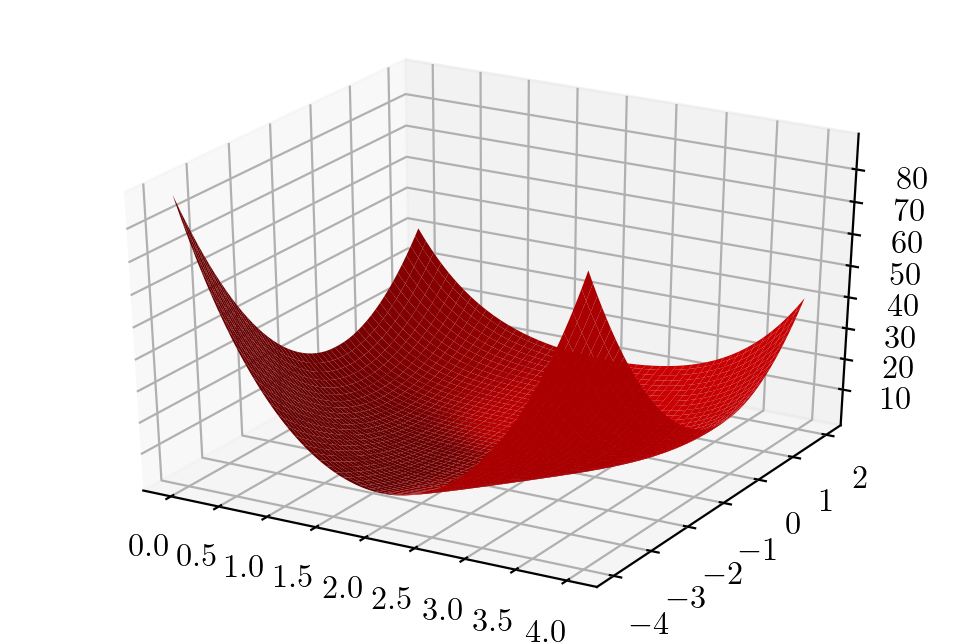

In [32]:
c = 1
f = lambda x: (c*x[0] - 2)**4 + x[1]**2 * (c*x[0] - 2)**2 + (x[1] + 1)**2
grad_f = grad(f)


ax = plot_func(f, lim=[0, 4, -4, 2], typ="surface")
#ax = plot_func(lambda x: np.linalg.norm(grad_f(x)), lim=[0, 4, -4, 2], typ="contour")

In [29]:
x = np.array([2., 0.]) # Why not

while True:
    direction = grad_f(x)
    direction /= np.linalg.norm(direction)
    print(direction)
    break

[0. 1.]
